In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install request
!pip install fosforml

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 8.3MB 9.6MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 94.3MB/s eta 0:00:0101
     |████████████████████████████████| 112kB 102.2MB/s eta 0:00:01
     |████████████████████████████████| 4.6MB 86.8MB/s eta 0:00:01
     |████████████████████████████████| 327kB 102.4MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 76.8MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 13.4MB 11.6MB/s eta 0:00:01
     |████████████████████████████████| 38.6MB 93.4MB/s eta 0:00:01
     |████████████████████████████████| 307kB 88.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement request (from versions: none)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#energyDataset = pd.read_excel('Energy_Inventory.xlsx')

In [7]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [8]:
table_name = 'INVENTORY_REFINERY'

In [9]:
sf_df = my_session.sql("select * from {}".format(table_name))
energyDataset =  sf_df.to_pandas()
energyDataset

,REFINERY_AREA_DESC,REFINERY_AREA,PLANT_NAME,PLANT_STATUS,MATERIAL_GROUP,MATERIAL_GROUP_DESCRIPTION,MATERIAL_NUMBER,MATERIAL_NUMBER_DESCRIPTION,LOCATION_ID,LOCATION_CODE,...,FLAGPLAN1,FLAGPLAN2,STOCK_FAMILY,STOCK_CATEGORY_NEW,STOCK_SUB_CATEGORY,LOCATION_LEVEL_0,LOCATION_LEVEL_1,LOCATION_LEVEL_2,LOCATION_LEVEL_3,STOCK_CATEGORY
0,CENTRAL AMERICA,AMR,IMPORTACIONES SPOT TRM,ACTIVE,105100,Not Classified,240133000,Anhydrous Ethanol (CO),478,COLOMBIA,...,No,No,OTHER,OTHER,ETHANOL,US EAST,LATAM SYSTEM,COLOMBIA,COLOMBIA,ETHANOL
1,CENTRAL AMERICA,CA,BUENAVENTURA TRM,ACTIVE,105100,Not Classified,240133000,Anhydrous Ethanol (CO),478,COLOMBIA,...,No,No,OTHER,OTHER,ETHANOL,US EAST,LATAM SYSTEM,COLOMBIA,COLOMBIA,ETHANOL
2,CENTRAL AMERICA,CA,CARTAGO TRM,ACTIVE,105100,Not Classified,240133000,Anhydrous Ethanol (CO),478,COLOMBIA,...,No,No,OTHER,OTHER,ETHANOL,US EAST,LATAM SYSTEM,COLOMBIA,COLOMBIA,ETHANOL
3,CENTRAL AMERICA,CA,GALAPA TRM,ACTIVE,105100,Not Classified,240133000,Anhydrous Ethanol (CO),478,COLOMBIA,...,No,No,OTHER,OTHER,ETHANOL,US EAST,LATAM SYSTEM,COLOMBIA,COLOMBIA,ETHANOL
4,CENTRAL AMERICA,CA,GUALANDAY TRM,ACTIVE,105100,Not Classified,240133000,Anhydrous Ethanol (CO),478,COLOMBIA,...,No,No,OTHER,OTHER,ETHANOL,US EAST,LATAM SYSTEM,COLOMBIA,COLOMBIA,ETHANOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134139,CENTRAL AMERICA,SV,ACAJUTLA TRM,ACTIVE,Not Classified,Not Classified,Not Classified,Not Classified,435,ACAJUTLA,...,No,No,PRODUCTS,GASOLINE,PUL,US EAST,LATAM SYSTEM,WCENTRAL AMERICA,ACAJUTLA,MOGAS
134140,CENTRAL AMERICA,SV,ACAJUTLA TRM,ACTIVE,Not Classified,Not Classified,Not Classified,Not Classified,435,ACAJUTLA,...,No,No,PRODUCTS,GASOLINE,RUL,US EAST,LATAM SYSTEM,WCENTRAL AMERICA,ACAJUTLA,MOGAS
134141,CENTRAL AMERICA,SV,ACAJUTLA TRM,ACTIVE,Not Classified,Not Classified,Not Classified,Not Classified,435,ACAJUTLA,...,No,No,PRODUCTS,DISTILLATE,LSD,US EAST,LATAM SYSTEM,WCENTRAL AMERICA,ACAJUTLA,LSD
134142,CENTRAL AMERICA,SV,RASA TRM,ACTIVE,450000,Not Classified,940033000,BUNKER F.OIL (GT/HN/PA/SV),852,RASA,...,No,No,INTERMEDIATES,FUEL OIL FEEDSTOCKS,FUEL OIL,US EAST,LATAM SYSTEM,WCENTRAL AMERICA,RASA,FUEL OIL


In [10]:
actualVolumes = energyDataset[energyDataset['FLAGACTUAL'] == 'Yes']
targetVolumes = energyDataset[energyDataset['ITEM_TYPE'] == 'TargetInventory']
print(len(actualVolumes), len(targetVolumes))

38558 34905


In [11]:
uniqueCombinations = actualVolumes.drop_duplicates(subset=['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME'])

# Compare lengths
if len(actualVolumes) == len(uniqueCombinations):
    print("All records are unique based on the combination of the six columns.")
else:
    print("There are duplicate records based on the combination of the six columns.")
print(len(actualVolumes) , len(uniqueCombinations))

There are duplicate records based on the combination of the six columns.
38558 27770


In [12]:
uniqueCombinations = targetVolumes.drop_duplicates(subset=['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME'])

# Compare lengths
if len(targetVolumes) == len(uniqueCombinations):
    print("All records are unique based on the combination of the six columns.")
else:
    print("There are duplicate records based on the combination of the six columns.")
print(len(targetVolumes) , len(uniqueCombinations))

There are duplicate records based on the combination of the six columns.
34905 34827


In [19]:
groupedActual = actualVolumes.groupby(['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME'])[['VOLUME_MBD']].sum().reset_index()
print(len(actualVolumes) , len(groupedActual))

38558 27770


In [20]:
groupedTarget = targetVolumes.groupby(['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME','TARGET_TYPE','ITEM_TYPE','TRANSIT_TYPE','TERMINAL_TYPE','REFINERY_AREA_DESC','LOCATION_ID','LOCATION_LEVEL_0','LOCATION_LEVEL_1','LOCATION_LEVEL_2','LOCATION_LEVEL_3','REFINERY_AREA','PLANT_STATUS'])[['VOLUME_MBD']].sum().reset_index()
print(len(targetVolumes) , len(groupedTarget))

34905 34827


In [21]:
groupedActual = groupedActual.rename(columns={'VOLUME_MBD':'VOLUME_MBD_ACTUAL'})

groupedTarget = groupedTarget.rename(columns={'VOLUME_MBD':'VOLUME_MBD_TARGET'})


In [22]:
merged_df = pd.merge(groupedTarget, groupedActual , on=['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME'], how='left')
pd.set_option('display.max_columns', None)
merged_df

,STOCK_FAMILY,STOCK_CATEGORY_NEW,STOCK_CATEGORY,STOCK_SUB_CATEGORY,INVENTORY_DATE,PLANT_NAME,TARGET_TYPE,ITEM_TYPE,TRANSIT_TYPE,TERMINAL_TYPE,REFINERY_AREA_DESC,LOCATION_ID,LOCATION_LEVEL_0,LOCATION_LEVEL_1,LOCATION_LEVEL_2,LOCATION_LEVEL_3,REFINERY_AREA,PLANT_STATUS,VOLUME_MBD_TARGET,VOLUME_MBD_ACTUAL
0,CRUDE,CRUDE,CRUDE,CRUDE,2021-10-30,EL SEGUNDO CA RFY,DEFINED,TargetInventory,IN TANK,REFINERY,EL SEGUNDO,372,US WEST COAST,EL SEGUNDO SUPPLY AREA,EL SEGUNDO REFINERY,EL SEGUNDO,ELSE,ACTIVE,2345.00,2162.75
1,CRUDE,CRUDE,CRUDE,CRUDE,2021-10-30,MISSISSIPPI MS MAR INTRANSIT,CALCULATED,TargetInventory,IN TANK,IN TRANSIT,PASCAGOULA,81,US EAST,PASCAGOULA SUPPLY AREA,PASCAGOULA REFINERY,PASCAGOULA,PASC,ACTIVE,78.82,NaN
2,CRUDE,CRUDE,CRUDE,CRUDE,2021-10-30,PASADENA TX RFY,DEFINED,TargetInventory,IN TANK,REFINERY,PASADENA,808,US EAST,PASADENA SUPPLY AREA,PASADENA REFINERY,PASADENA,PASA,ACTIVE,745.00,1325.86
3,CRUDE,CRUDE,CRUDE,CRUDE,2021-10-30,PASCAGOULA MS RFY,DEFINED,TargetInventory,IN TANK,REFINERY,PASCAGOULA,81,US EAST,PASCAGOULA SUPPLY AREA,PASCAGOULA REFINERY,PASCAGOULA,PASC,ACTIVE,2186.00,1920.00
4,CRUDE,CRUDE,CRUDE,CRUDE,2021-10-30,RICHMOND CA RFY,DEFINED,TargetInventory,IN TANK,REFINERY,RICHMOND,315,US WEST COAST,RICHMOND SUPPLY AREA,BAY AREA,BAPL,RICH,ACTIVE,1780.00,2162.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34822,PRODUCTS,GASOLINE,MOGAS,RUL,2024-12-31,WASKOM TX TRM SUNOCO,CALCULATED,TargetInventory,IN TANK,TERMINAL,PASCAGOULA,848,US EAST,PASCAGOULA SUPPLY AREA,FLORIDA,PANAMA CITY,PASC,ACTIVE,4.23,NaN
34823,PRODUCTS,GASOLINE,MOGAS,RUL,2024-12-31,WATSON PPL CA INTRANSIT,CALCULATED,TargetInventory,IN TRANSIT,IN TRANSIT,EL SEGUNDO,797,US WEST COAST,EL SEGUNDO SUPPLY AREA,SOCAL AREA,KM SOCAL,ELSE,ACTIVE,107.85,NaN
34824,PRODUCTS,GASOLINE,MOGAS,RUL,2024-12-31,WILLIAMS PPL OK INTRANSIT,CALCULATED,TargetInventory,IN TRANSIT,IN TRANSIT,PASCAGOULA,848,US EAST,PASCAGOULA SUPPLY AREA,FLORIDA,PANAMA CITY,PASC,ACTIVE,2.20,NaN
34825,PRODUCTS,GASOLINE,MOGAS,RUL,2024-12-31,YUMBO - BUENAVENTURA PPL,CALCULATED,TargetInventory,IN TRANSIT,IN TRANSIT,CENTRAL AMERICA,478,US EAST,LATAM SYSTEM,COLOMBIA,COLOMBIA,CA,ACTIVE,8.48,NaN


In [28]:
import hashlib
def hashColumns(row):
    concatenated = f"{row['
merged_df['RECORD_ID'] = haslib.sha256(

In [23]:
# Check for missing values
missing_values = merged_df.isnull()
#print(missing_values)

# Count missing values in each column
missing_count = merged_df.isnull().sum()
print(missing_count)

STOCK_FAMILY             0
STOCK_CATEGORY_NEW       0
STOCK_CATEGORY           0
STOCK_SUB_CATEGORY       0
INVENTORY_DATE           0
PLANT_NAME               0
TARGET_TYPE              0
ITEM_TYPE                0
TRANSIT_TYPE             0
TERMINAL_TYPE            0
REFINERY_AREA_DESC       0
LOCATION_ID              0
LOCATION_LEVEL_0         0
LOCATION_LEVEL_1         0
LOCATION_LEVEL_2         0
LOCATION_LEVEL_3         0
REFINERY_AREA            0
PLANT_STATUS             0
VOLUME_MBD_TARGET        0
VOLUME_MBD_ACTUAL     7832
dtype: int64


In [24]:
unique_values = merged_df.nunique()
print(unique_values)

STOCK_FAMILY             4
STOCK_CATEGORY_NEW       9
STOCK_CATEGORY          42
STOCK_SUB_CATEGORY      46
INVENTORY_DATE          39
PLANT_NAME             235
TARGET_TYPE              2
ITEM_TYPE                1
TRANSIT_TYPE             2
TERMINAL_TYPE            3
REFINERY_AREA_DESC       6
LOCATION_ID             41
LOCATION_LEVEL_0         3
LOCATION_LEVEL_1        10
LOCATION_LEVEL_2        30
LOCATION_LEVEL_3        41
REFINERY_AREA           14
PLANT_STATUS             1
VOLUME_MBD_TARGET      625
VOLUME_MBD_ACTUAL     9074
dtype: int64


In [25]:
merged_df['INVENTORY_DATE'] = pd.to_datetime(merged_df['INVENTORY_DATE'])

# Extract year and month
merged_df['YEAR'] = merged_df['INVENTORY_DATE'].dt.year
merged_df['MONTH'] = merged_df['INVENTORY_DATE'].dt.strftime('%b')

In [26]:
merged_df.drop(['STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME','LOCATION_ID','LOCATION_LEVEL_3','ITEM_TYPE','PLANT_STATUS'],axis=1, inplace=True)

In [27]:
unique_values = merged_df.nunique()
print(unique_values)

STOCK_FAMILY             4
STOCK_CATEGORY_NEW       9
STOCK_CATEGORY          42
TARGET_TYPE              2
TRANSIT_TYPE             2
TERMINAL_TYPE            3
REFINERY_AREA_DESC       6
LOCATION_LEVEL_0         3
LOCATION_LEVEL_1        10
LOCATION_LEVEL_2        30
REFINERY_AREA           14
VOLUME_MBD_TARGET      625
VOLUME_MBD_ACTUAL     9074
YEAR                     4
MONTH                   12
dtype: int64


In [74]:
final_dataset = merged_df

,STOCK_FAMILY,STOCK_CATEGORY_NEW,STOCK_CATEGORY,TARGET_TYPE,VOLUME_MBD_TARGET,TRANSIT_TYPE,TERMINAL_TYPE,REFINERY_AREA_DESC,LOCATION_LEVEL_0,LOCATION_LEVEL_1,LOCATION_LEVEL_2,REFINERY_AREA,VOLUME_MBD_ACTUAL,YEAR,MONTH
0,CRUDE,CRUDE,CRUDE,DEFINED,2345.00,IN TANK,REFINERY,EL SEGUNDO,US WEST COAST,EL SEGUNDO SUPPLY AREA,EL SEGUNDO REFINERY,ELSE,2162.75,2021,Jun
1,CRUDE,CRUDE,CRUDE,DEFINED,745.00,IN TANK,REFINERY,PASADENA,US EAST,PASADENA SUPPLY AREA,PASADENA REFINERY,PASA,1325.86,2021,Jun
2,CRUDE,CRUDE,CRUDE,DEFINED,2186.00,IN TANK,REFINERY,PASCAGOULA,US EAST,PASCAGOULA SUPPLY AREA,PASCAGOULA REFINERY,PASC,1920.00,2021,Jun
3,CRUDE,CRUDE,CRUDE,DEFINED,1780.00,IN TANK,REFINERY,RICHMOND,US WEST COAST,RICHMOND SUPPLY AREA,BAY AREA,RICH,2162.69,2021,Jun
4,CRUDE,CRUDE,CRUDE,DEFINED,260.00,IN TANK,REFINERY,SALT LAKE,SALT LAKE OPT AREA,SALT LAKE REFINERY,SALT LAKE REFINERY,SLAK,322.85,2021,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26990,PRODUCTS,GASOLINE,MOGAS,CALCULATED,4.23,IN TANK,TERMINAL,PASCAGOULA,US EAST,PASCAGOULA SUPPLY AREA,FLORIDA,PASC,4.45,2024,Apr
26991,PRODUCTS,GASOLINE,MOGAS,CALCULATED,107.85,IN TRANSIT,IN TRANSIT,EL SEGUNDO,US WEST COAST,EL SEGUNDO SUPPLY AREA,SOCAL AREA,ELSE,27.66,2024,Apr
26992,PRODUCTS,GASOLINE,MOGAS,CALCULATED,2.20,IN TRANSIT,IN TRANSIT,PASCAGOULA,US EAST,PASCAGOULA SUPPLY AREA,FLORIDA,PASC,2.04,2024,Apr
26993,PRODUCTS,GASOLINE,MOGAS,CALCULATED,8.48,IN TRANSIT,IN TRANSIT,CENTRAL AMERICA,US EAST,LATAM SYSTEM,COLOMBIA,CA,11.72,2024,Apr


In [59]:
one_hot = pd.get_dummies(final_dataset, columns=['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY',
                                           'TRANSIT_TYPE','TERMINAL_TYPE',
                                           'REFINERY_AREA_DESC','LOCATION_LEVEL_0',
                                           'LOCATION_LEVEL_1','LOCATION_LEVEL_2','TARGET_TYPE',
                                           'REFINERY_AREA','YEAR','MONTH'], 
                                            prefix = ['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY',
                                           'TRANSIT_TYPE','TERMINAL_TYPE',
                                           'REFINERY_AREA_DESC','LOCATION_LEVEL_0',
                                           'LOCATION_LEVEL_1','LOCATION_LEVEL_2','TARGET_TYPE',
                                           'REFINERY_AREA','YEAR','MONTH'],drop_first=True, dtype=int)
# concatenate the one-hot encoding with the original dataframe
one_hot = one_hot.drop(['VOLUME_MBD_TARGET','VOLUME_MBD_ACTUAL',], axis= 1)
df1 = pd.concat([final_dataset, one_hot], axis=1)
# drop the original 'color' column
df1 = df1.drop(['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY',
                                           'TRANSIT_TYPE','TERMINAL_TYPE',
                                           'REFINERY_AREA_DESC','LOCATION_LEVEL_0',
                                           'LOCATION_LEVEL_1','LOCATION_LEVEL_2','TARGET_TYPE',
                                           'REFINERY_AREA','YEAR','MONTH'], axis=1)

In [108]:
df1.columns = df1.columns.str.replace(' ', '_')
df1.columns = df1.columns.str.replace('_/', '')
df1.columns = df1.columns.str.upper()
df1

,VOLUME_MBD_TARGET,VOLUME_MBD_ACTUAL,STOCK_FAMILY_INTERMEDIATES,STOCK_FAMILY_OTHER,STOCK_FAMILY_PRODUCTS,STOCK_CATEGORY_NEW_CYCLE_OIL,STOCK_CATEGORY_NEW_DISTILLATE,STOCK_CATEGORY_NEW_DISTILLATE_FEEDSTOCKS,STOCK_CATEGORY_NEW_FUEL_OIL_FEEDSTOCKS,STOCK_CATEGORY_NEW_GASOIL_FEEDSTOCKS,STOCK_CATEGORY_NEW_GASOLINE,STOCK_CATEGORY_NEW_MOGAS_FEEDSTOCKS,STOCK_CATEGORY_NEW_OTHER,STOCK_CATEGORY_ASPHALT,STOCK_CATEGORY_AVGAS,STOCK_CATEGORY_CHDN_FEED,STOCK_CATEGORY_COKE,STOCK_CATEGORY_CRUDE,STOCK_CATEGORY_DIESEL,STOCK_CATEGORY_DIESEL_ADDITIVES,STOCK_CATEGORY_DIESEL_BLENDSTOCK,STOCK_CATEGORY_DLCO,STOCK_CATEGORY_ETHANOL,STOCK_CATEGORY_FINISHED_BASE_OIL,STOCK_CATEGORY_FINISHED_CHEMICALS,STOCK_CATEGORY_FUEL_OIL,STOCK_CATEGORY_GASOLINE_ADDITIVES,STOCK_CATEGORY_HCGO,STOCK_CATEGORY_HCO,STOCK_CATEGORY_HSR,STOCK_CATEGORY_HSVGO,STOCK_CATEGORY_ISOMAX_TKN_FEED,STOCK_CATEGORY_JET,STOCK_CATEGORY_JET_BLENDSTOCK,STOCK_CATEGORY_LCO,STOCK_CATEGORY_LPG,STOCK_CATEGORY_LSD,STOCK_CATEGORY_LSVGO,STOCK_CATEGORY_LSWR,STOCK_CATEGORY_MOGAS,STOCK_CATEGORY_NAPHTHA,STOCK_CATEGORY_NATURAL_GAS,STOCK_CATEGORY_OTHER,STOCK_CATEGORY_PBOP_FEED,STOCK_CATEGORY_PENHEX,STOCK_CATEGORY_RDS_FEED,STOCK_CATEGORY_RECOVERED_OIL,STOCK_CATEGORY_RESID,STOCK_CATEGORY_SR_DIESEL,STOCK_CATEGORY_SR_JET,STOCK_CATEGORY_SULFUR,STOCK_CATEGORY_TETRAMER,STOCK_CATEGORY_TRANSMIX,STOCK_CATEGORY_WAXY_BASE_OIL,TRANSIT_TYPE_IN_TRANSIT,TERMINAL_TYPE_REFINERY,TERMINAL_TYPE_TERMINAL,REFINERY_AREA_DESC_EL_SEGUNDO,REFINERY_AREA_DESC_PASADENA,REFINERY_AREA_DESC_PASCAGOULA,REFINERY_AREA_DESC_RICHMOND,REFINERY_AREA_DESC_SALT_LAKE,LOCATION_LEVEL_0_US_EAST,LOCATION_LEVEL_0_US_WEST_COAST,LOCATION_LEVEL_1_IDAHO_TERMINALS,LOCATION_LEVEL_1_LATAM_SYSTEM,LOCATION_LEVEL_1_PASADENA_SUPPLY_AREA,LOCATION_LEVEL_1_PASCAGOULA_SUPPLY_AREA,LOCATION_LEVEL_1_PNW_TERMINALS,LOCATION_LEVEL_1_RICHMOND_SUPPLY_AREA,LOCATION_LEVEL_1_SALT_LAKE_REFINERY,LOCATION_LEVEL_1_SALT_LAKE_TERMINALS,LOCATION_LEVEL_1_SOUTH_TERMINALS,LOCATION_LEVEL_2_BOISE_TERMINAL,LOCATION_LEVEL_2_BURLEY_TERMINAL,LOCATION_LEVEL_2_CEDARCTY,LOCATION_LEVEL_2_COLOMBIA,LOCATION_LEVEL_2_COLONIAL,LOCATION_LEVEL_2_ECENTRAL_AMERICA,LOCATION_LEVEL_2_EL_PASO,LOCATION_LEVEL_2_EL_SEGUNDO_REFINERY,LOCATION_LEVEL_2_FLORIDA,LOCATION_LEVEL_2_LA_MS_OH_TN,LOCATION_LEVEL_2_LVHOLLY,LOCATION_LEVEL_2_NY_HARBOR,LOCATION_LEVEL_2_PANAMA,LOCATION_LEVEL_2_PASADENA_REFINERY,LOCATION_LEVEL_2_PASC_RACK_FOB,LOCATION_LEVEL_2_PASCAGOULA_REFINERY,LOCATION_LEVEL_2_PASCO,LOCATION_LEVEL_2_PASCO_PPL,LOCATION_LEVEL_2_PHOENIX_AREA,LOCATION_LEVEL_2_PLANTATION_DUAL,LOCATION_LEVEL_2_POCATELLO_TERMINAL,LOCATION_LEVEL_2_POCATELLO_UPRR,LOCATION_LEVEL_2_SALT_LAKE_PPL_INTRANSIT,LOCATION_LEVEL_2_SALT_LAKE_REFINERY,LOCATION_LEVEL_2_SALT_LAKE_TERMINAL,LOCATION_LEVEL_2_SOCAL_AREA,LOCATION_LEVEL_2_SPOKANE_HOLLY,LOCATION_LEVEL_2_TEXAS,LOCATION_LEVEL_2_WCENTRAL_AMERICA,TARGET_TYPE_DEFINED,REFINERY_AREA_CA,REFINERY_AREA_ELPA,REFINERY_AREA_ELSE,REFINERY_AREA_GT,REFINERY_AREA_HN,REFINERY_AREA_HNOA,REFINERY_AREA_PA,REFINERY_AREA_PAOA,REFINERY_AREA_PASA,REFINERY_AREA_PASC,REFINERY_AREA_RICH,REFINERY_AREA_SLAK,REFINERY_AREA_SV,YEAR_2022,YEAR_2023,YEAR_2024,MONTH_AUG,MONTH_DEC,MONTH_FEB,MONTH_JAN,MONTH_JUL,MONTH_JUN,MONTH_MAR,MONTH_MAY,MONTH_NOV,MONTH_OCT,MONTH_SEP
0,2345.00,2162.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,745.00,1325.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2186.00,1920.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [109]:

X_array = df1.drop(['VOLUME_MBD_ACTUAL'], axis= 1)
y_array= df1[['VOLUME_MBD_ACTUAL']]
X = X_array.iloc[:].values
y = y_array.iloc[:].values
print(X)

[[2.345e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [7.450e+02 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.186e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.200e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [8.480e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.079e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


In [110]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(df1.drop('VOLUME_MBD_ACTUAL', axis=1), df1['VOLUME_MBD_ACTUAL'], test_size=0.2, random_state=42)

In [111]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [112]:
y_pred = regressor.predict(X_test)


In [113]:
results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    #results_df = results_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2':r2}, ignore_index=True)
    results_df = pd.concat([results_df, pd.DataFrame([{'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2':r2}])], ignore_index=True)
print(results_df)

                       Model           MSE        MAE        R2
0           LinearRegression   5215.422984  24.845847  0.811278
1                      Ridge   5219.772608  24.783991  0.811121
2                      Lasso   6125.487560  22.990925  0.778348
3                 ElasticNet   6346.542384  22.949499  0.770349
4        KNeighborsRegressor   2885.190646  15.099373  0.895599
5      DecisionTreeRegressor   3936.778938  19.366566  0.857547
6      RandomForestRegressor   2869.730658  15.355571  0.896158
7  GradientBoostingRegressor   3222.276466  18.166092  0.883401
8                        SVR  18089.518421  24.988500  0.345426


In [114]:
from sklearn.neighbors import KNeighborsRegressor

neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i]=knn.score(X_train, y_train)
    
    test_accuracy[i]=knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

[0.99997147 0.95045078 0.93096859 0.92274337 0.91602475 0.911408
 0.91054367 0.90817819]
[0.83361556 0.88483991 0.89953589 0.89802939 0.89559857 0.89803471
 0.89788308 0.89892365]


In [115]:
knn = KNeighborsRegressor()

# Define the parameter grid for the grid search
param_grid = {
    'n_neighbors': [7,9,11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters: ", grid_search.best_params_)

# Print the best score found by the grid search
print("Best score: ", -grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_knn = grid_search.best_estimator_
predictions = best_knn.predict(X_test)

Best parameters:  {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best score:  3750.363528942743


In [116]:
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
knn_score = best_knn.score(X_test, y_test)
print(mse)
print(rmse)
print(r2)
print(knn_score)

2837.6626585599984
53.26971614867117
0.8973183825335751
0.8973183825335751


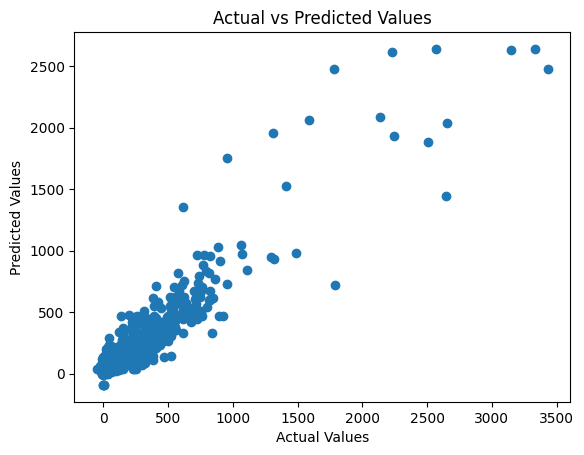

In [117]:
y_pred_original = np.expm1(y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [69]:
# param_grid = {
#     'n_estimators': [100,200],
#     'learning_rate': [0.2],
#     'max_depth': [4],
#     'min_samples_split': [10],
#     'min_samples_leaf': [ 4],
#     'subsample': [1.0]
# }
# gb_reg = GradientBoostingRegressor()
# grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# print(best_params, best_model)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0} GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_leaf=4,
                          min_samples_split=10)


In [70]:
# y_pred = grid_search.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

In [71]:
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("Mean Squared Error (MSE):", mse)
# print("Mean Absolute Error (MAE):", mae)
# print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2911.2151988688915
Mean Absolute Error (MAE): 16.07179201444344
R-squared (R2): 0.8946568632776131


In [72]:
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_model.feature_importances_})
# feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
# print("Feature Importance:")
# print(feature_importance)

Feature Importance:
                             Feature  Importance
0                  VOLUME_MBD_TARGET    0.868674
38              STOCK_CATEGORY_MOGAS    0.021707
37               STOCK_CATEGORY_LSWR    0.015853
54            TERMINAL_TYPE_REFINERY    0.011164
116                        YEAR_2023    0.010751
..                               ...         ...
105                 REFINERY_AREA_GT    0.000000
109               REFINERY_AREA_PAOA    0.000000
47          STOCK_CATEGORY_SR DIESEL    0.000000
42          STOCK_CATEGORY_PBOP FEED    0.000000
18   STOCK_CATEGORY_DIESEL ADDITIVES    0.000000

[129 rows x 2 columns]


In [118]:
y_pred_df = pd.DataFrame(y_pred , columns = ['volume_pred'])
y_pred_df

,volume_pred
0,4.924444
1,83.366667
2,0.171111
3,24.325556
4,7.728889
...,...
5394,0.320000
5395,24.444444
5396,0.077778
5397,-0.040000


In [120]:
from fosforml import register_model

registered_model = register_model(
  model_obj=best_knn,
  session=my_session,
  x_train=X_train,
  y_train=y_train,
  x_test=X_test,
  y_test=y_test,
  y_pred=y_pred_df,
  source="Notebook",
  dataset_name="REFINERY_INVENTORY",
  dataset_source="Snowflake",
  name="REFINERY_INVENTORY",
  description="This model predict actual volume of oil and gas generated by a plant",
  flavour="sklearn",
  model_type="regression",
  conda_dependencies=["scikit-learn==1.3.2"]
)

Calculating build time metrics

Progress: ██████████████████                                                     25.0%


Calculating build time metrics

Progress: ███████████████████████████████████                                    50.0%
Calculating build time metrics

Progress: ████████████████████████████████████████████████████                   75.0%
Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


In [105]:
X_test.to_csv('Testing_data.csv')

In [126]:
type(registered_model)

str

In [125]:
registered_model.dir()

AttributeError: 'str' object has no attribute 'dir'